In [1]:
#|default_exp app

### Gradio Pets

In [ ]:
pip install gradio

In [15]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

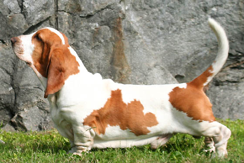

In [3]:
im = PILImage.create('basset.jpg')
im.thumbnail((244,244))
im

In [4]:
#export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([0.0000e+00, 0.0000e+00, 1.5414e-44, 7.9657e-37, 1.0446e-38, 0.0000e+00,
         3.4390e-37, 4.2039e-45, 8.3639e-38, 5.9449e-35, 0.0000e+00, 8.8697e-06,
         9.7376e-34, 1.2612e-43, 9.9999e-01, 2.8407e-12, 0.0000e+00, 0.0000e+00,
         1.1414e-13, 5.4343e-37, 7.6881e-31, 2.9205e-26, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.1547e-40, 0.0000e+00, 1.4013e-45, 0.0000e+00, 4.9606e-43,
         5.4720e-21, 0.0000e+00, 2.1085e-39, 0.0000e+00, 1.9618e-44, 5.9994e-33,
         0.0000e+00]))

In [7]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [8]:
classify_image(im)

{'Abyssinian': 0.0,
 'Bengal': 0.0,
 'Birman': 1.5414283107572988e-44,
 'Bombay': 7.965669237443445e-37,
 'British_Shorthair': 1.0445530986800765e-38,
 'Egyptian_Mau': 0.0,
 'Maine_Coon': 3.4390332841905766e-37,
 'Persian': 4.203895392974451e-45,
 'Ragdoll': 8.363915009992121e-38,
 'Russian_Blue': 5.94488876581287e-35,
 'Siamese': 0.0,
 'Sphynx': 8.86972247826634e-06,
 'american_bulldog': 9.737629898318745e-34,
 'american_pit_bull_terrier': 1.2611686178923354e-43,
 'basset_hound': 0.9999911785125732,
 'beagle': 2.840651325275445e-12,
 'boxer': 0.0,
 'chihuahua': 0.0,
 'english_cocker_spaniel': 1.141449944546541e-13,
 'english_setter': 5.434311226872591e-37,
 'german_shorthaired': 7.688051378247963e-31,
 'great_pyrenees': 2.9204567483606807e-26,
 'havanese': 0.0,
 'japanese_chin': 0.0,
 'keeshond': 0.0,
 'leonberger': 1.1547399995268655e-40,
 'miniature_pinscher': 0.0,
 'newfoundland': 1.401298464324817e-45,
 'pomeranian': 0.0,
 'pug': 4.9605965637098524e-43,
 'saint_bernard': 5.4720073

In [18]:
#export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['basset.jpg']

In [21]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://a63a81a3c9f19d3aba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [11]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [12]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 7.3964e-01,  2.8090e+00,  4.8409e-01,  1.0741e-01,  8.4167e-01,
         -2.2708e-02,  2.6156e+00,  1.0604e-01,  2.8005e-01, -1.0471e-03,
         -1.2264e-01, -7.1497e-03,  3.1988e-01,  2.0790e+00,  1.2739e+00,
          2.2685e+00,  2.0366e+00,  5.3795e-01,  9.2910e-02,  3.0848e-01,
          9.9762e-01,  1.7917e+00,  3.2898e-01,  3.6030e-01,  2.5712e-01,
          8.6518e-01,  5.2512e-01,  4.5691e-01,  2.2415e+00,  8.1096e-01,
          1.2599e+00, -1.2066e-02,  3.2281e+00,  8.5639e-01,  3.8809e-01,
          3.9632e+00,  7.2244e-01,  4.0191e-01,  3.3601e-01,  8.6878e-01,
          6.6370e-01,  5.8502e-01,  1.5222e+00,  1.2866e+00, -1.0196e-02,
          1.4708e+00,  4.6358e-01,  1.0511e+00,  2.5101e+00,  1.5031e+00,
          2.3863e-01,  4.2505e-01,  3.3499e-02,  2.1628e+00,  1.4068e+00,
          4.1388e-01,  5.7493e-01,  4.8126e-01,  1.9131e-01, -7.7128e-03,
          5.8031e-03,  1.0190e-01,  1.2221e+00,  7.1371e-01,  1.9396e+00,
          1.731

In [13]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 0.0117,  0.0076, -0.0306,  ..., -0.0128, -0.0067, -0.0089],
         [-0.0059,  0.0001, -0.0082,  ...,  0.0277, -0.0170, -0.0140],
         [ 0.0056,  0.0519,  0.0784,  ...,  0.0093, -0.0618, -0.0205],
         ...,
         [ 0.0060, -0.0174,  0.0012,  ...,  0.0111, -0.0610,  0.0046],
         [-0.0420, -0.0264,  0.0308,  ...,  0.0291, -0.0129,  0.0148],
         [ 0.0205, -0.0608,  0.0932,  ..., -0.0155,  0.0049,  0.0095]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.9148, -0.2177, -0.5889, -1.1975, -1.0995, -0.8033, -0.9720, -0.4716,
         -0.7183, -1.1050, -0.9372, -1.4655, -1.4824, -0.9137, -0.5318, -1.0186,
         -0.8199, -0.6667, -0.8226, -0.4461, -0.7596, -1.4394, -0.6174, -1.5610,
         -1.0937, -1.3963, -1.9876, -1.8714, -0.6836, -1.2929, -0.3834, -1.4797,
         -0.7572, -1.5453, -0.5094, -1.5347, -0.6345, -1.2130, -1.1853, -0.6575,
         -0.2664, -1.1473, -1.1221, -1.4021, -0.2823, -0.3895, -0.4416, -0.6713